In [5]:
import pandas 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


df = pandas.read_csv('StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.shape

(6607, 20)

In [8]:
df.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [9]:
print("What are the missing values in the dataset?")
df.isnull().sum()

What are the missing values in the dataset?


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

for col in columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
print("Rechecking the for empty datasets")
df.isnull().sum()

Rechecking the for empty datasets


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

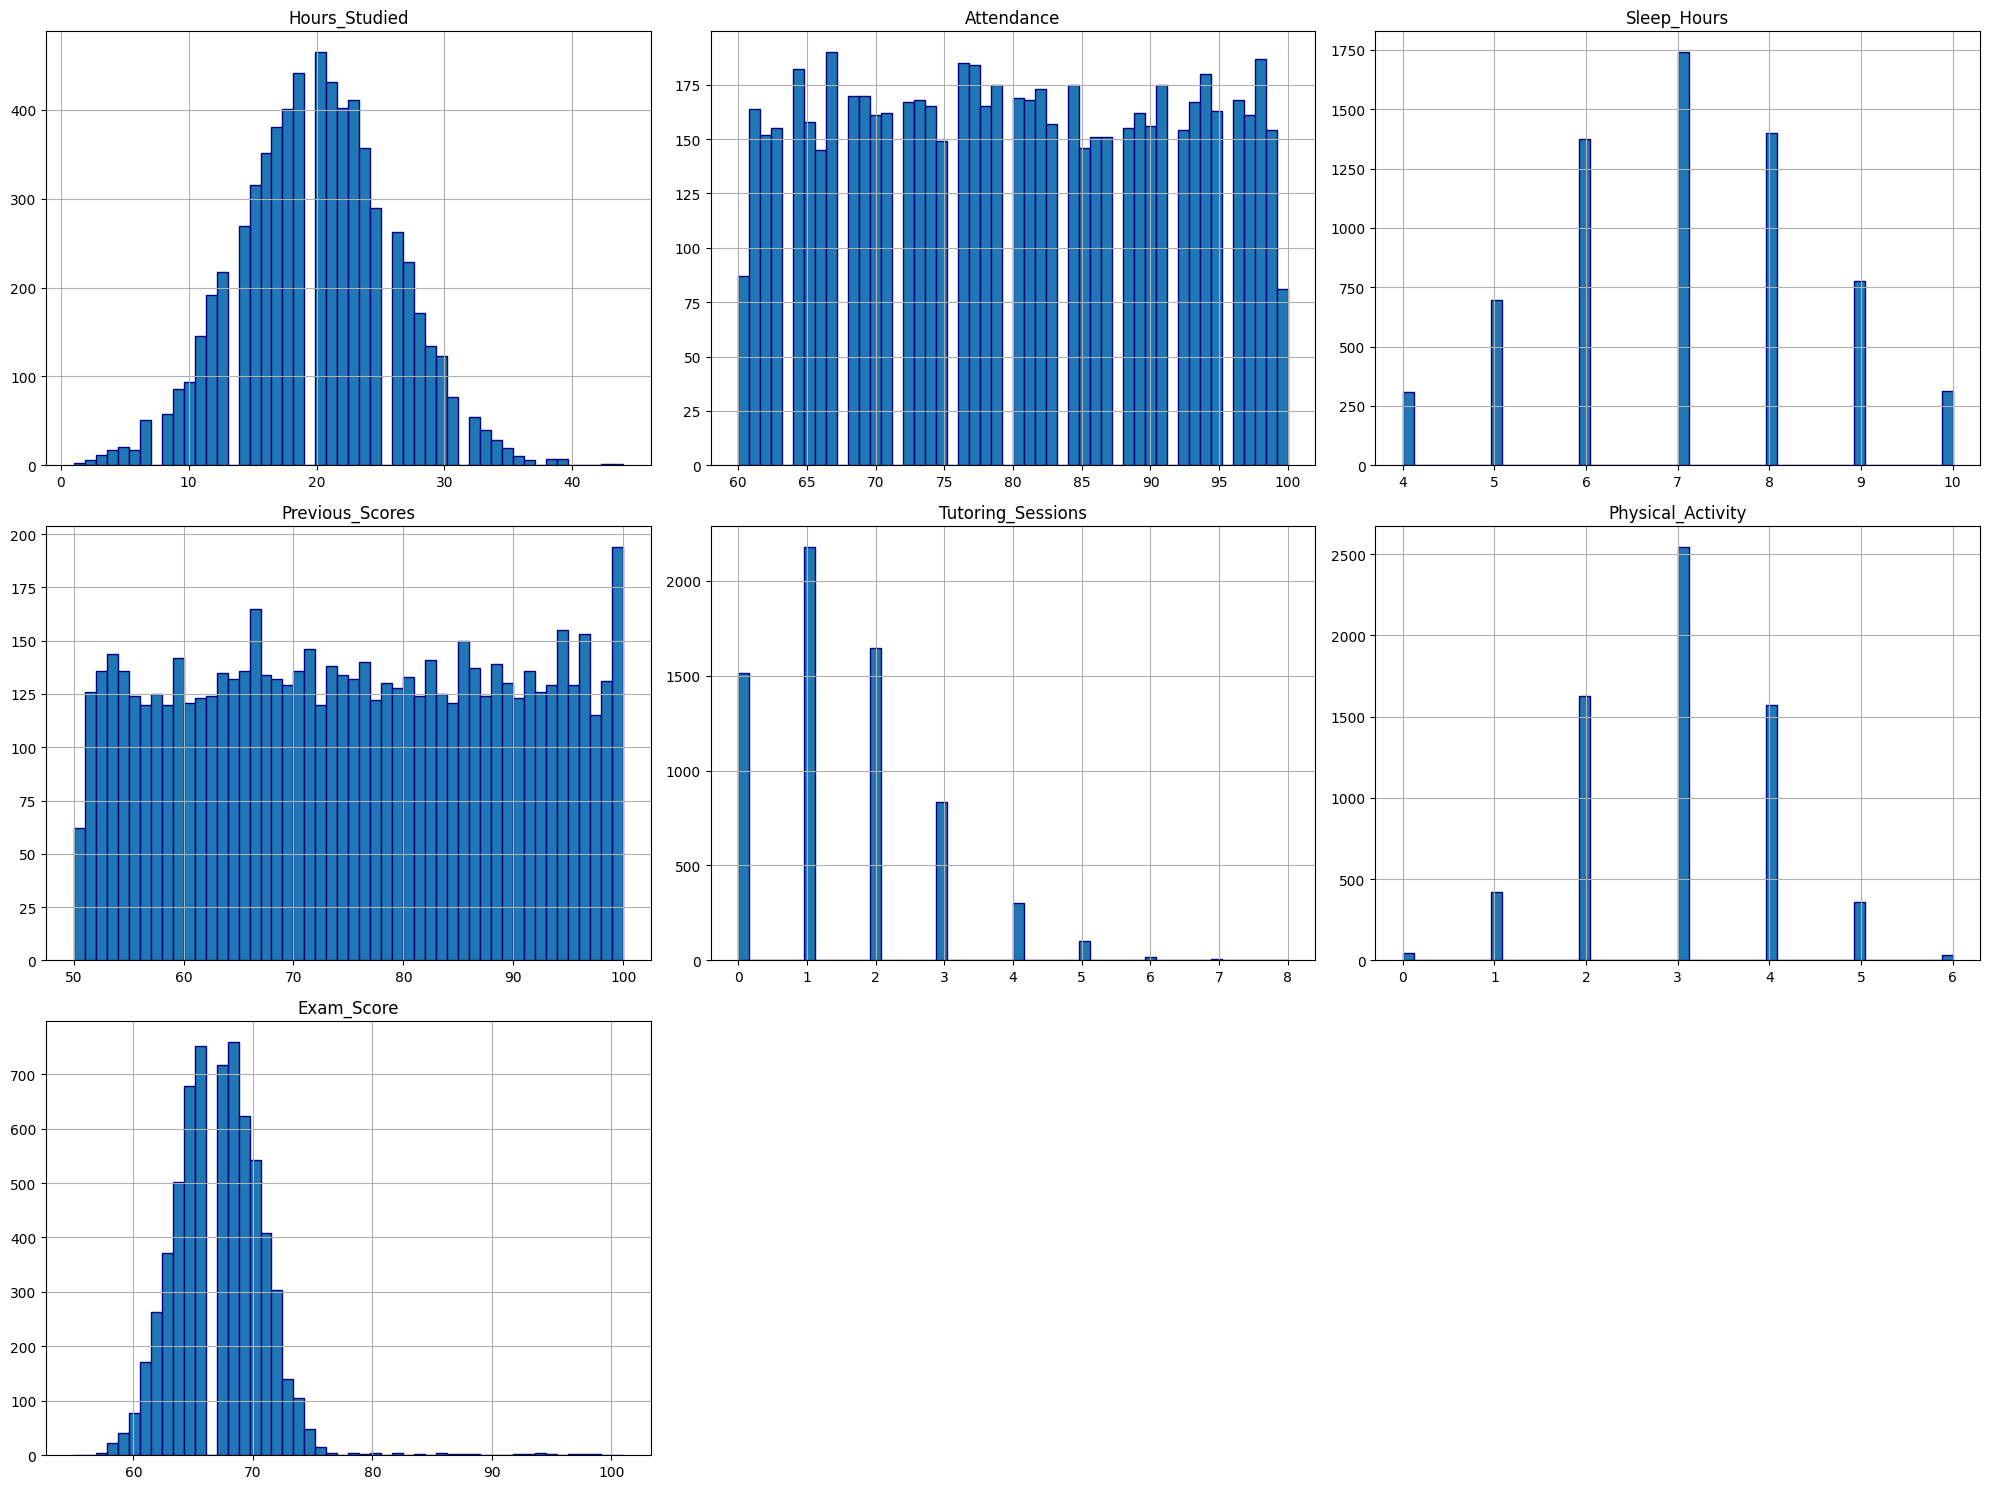

In [13]:
df.hist(bins=50, figsize=(20,15), edgecolor='navy')
plt.tight_layout()
plt.show()

In [14]:
df.corr(numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


In [15]:
df.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [16]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [17]:
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

In [18]:
target = 'Exam_Score'

In [19]:
df_models = df[features + [target]].copy()

In [20]:
df_models

,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,0,3,67
1,19,64,8,2,4,61
2,24,98,7,2,4,74
3,29,89,8,1,4,71
4,19,92,6,3,4,70
...,...,...,...,...,...,...
6602,25,69,7,1,2,68
6603,23,76,8,3,2,69
6604,20,90,6,3,2,68
6605,10,86,6,2,3,68


In [21]:
x = df_models[features]
y = df_models[target]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
len(y_test)

1322

In [24]:
len(y_train)

5285

In [25]:
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
    }
}

In [30]:
best_models = []

for name, config in models.items():
    print(f"Training {name}...")
    
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    best_models.append({
        'model': name,
        'best_params': grid.best_params_,
        'rmse': rmse,
        'r2_score': r2
    })

Training Linear Regression...
Training Decision Tree...
Training Random Forest...


In [31]:
best_models


[{'model': 'Linear Regression',
  'best_params': {},
  'rmse': 7.804732177980393,
  'r2_score': 0.5070338041508253},
 {'model': 'Decision Tree',
  'best_params': {'max_depth': 5, 'min_samples_split': 2},
  'rmse': 8.366880448682233,
  'r2_score': 0.471527128432609},
 {'model': 'Random Forest',
  'best_params': {'max_depth': 7,
   'min_samples_split': 10,
   'n_estimators': 200},
  'rmse': 8.072610754151164,
  'r2_score': 0.49011393045971174}]

In [32]:
results = pandas.DataFrame(best_models)

In [33]:
results.sort_values(by='rmse')

,model,best_params,rmse,r2_score
0,Linear Regression,{},7.804732,0.507034
2,Random Forest,"{'max_depth': 7, 'min_samples_split': 10, 'n_e...",8.072611,0.490114
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",8.366880,0.471527


In [34]:
import joblib

best_row = results.sort_values(by='rmse').iloc[0]

In [35]:
best_row

model          Linear Regression
best_params                   {}
rmse                    7.804732
r2_score                0.507034
Name: 0, dtype: object

In [36]:
best_models_show =  best_row['model']

In [37]:
best_models_show

'Linear Regression'

In [38]:
best_models_config = models[best_models_show]

In [39]:
best_models_config

{'model': LinearRegression(), 'params': {}}

In [40]:
final_models = best_models_config['model']

In [41]:
final_models.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
joblib.dump(final_models, 'student_success_models.pkl')

['student_success_models.pkl']

In [44]:
joblib.load('student_success_models.pkl').predict(x_test)

array([66.85842546, 62.38748437, 68.51967171, ..., 67.5430762 ,
       69.00176618, 61.92312598], shape=(1322,))